# MODELS
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

<center><img src="https://larspsyll.files.wordpress.com/2014/09/amath.jpg" width="300"/></center>

Mathematical modelling is the process of describing a real world problem in mathematical terms, usually in the form of equations, and then using these equations both to help understand the original problem, and also to discover new features about the problem. [2] A model may help to explain a system and to study the effects of different components, and to make predictions about behavior. [1] Mathematical models are used in the natural sciences (such as physics, biology, earth science, chemistry) and engineering disciplines (such as computer science, electrical engineering), as well as in non-physical systems such as the social sciences (such as economics, psychology, sociology, political science). [3] There are many different mathematical models and the focus in this notebook will be on the linear one.

### LINEAR REGRESSION

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Linear models describe a continuous response variable as a function of one or more predictor variables. They can help you understand and predict the behavior of complex systems. [4] 

A very common equotion is the one for the straight line:

###  $$y = mx + c$$

| m is the gradient of the line (how steep the line is). c is the y-intercept (the point in which the line crosses the y-axis). x and y relate to coordinates on the line |
| :-: |
|  |



When we input a value for x into the equation y = mx + c, we get a result for y. [7]

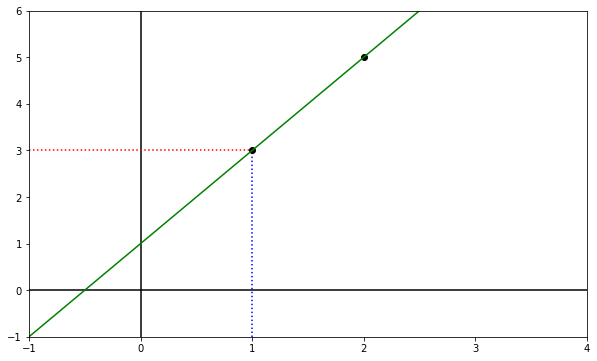

In [1]:
# Import matplotlib.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# Draw some axes.
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')

# Plot the two points (1,3) and (2,5).
plt.plot([1, 2], [3, 5], 'ko')
# Join them with an (extending) green lines.
plt.plot([-1, 10], [-1, 21], 'g-')

# Set some reasonable plot limits.
plt.xlim([-1, 4])
plt.ylim([-1, 6])

# Show the plot.
plt.show()

Statistical method to create a linear model is linear regression. [4] Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range. [5] The term regression is used when you try to find the relationship between variables. In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events. [6]

Simple linear regression uses traditional slope-intercept form, where m and c are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction. [5]

### ANALYSIS

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

#### SIMULATING DATA

In [2]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

In [3]:
x = np.arange(0.0, 21.0, 1.0)
y = 5.0 * x + 10.0 + np.random.normal(0.0, 5.0, x.size)
x, y

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([ -4.11044431,  10.42951478,  20.51158075,  24.64897169,
         29.61358863,  35.33335304,  45.660517  ,  44.50235563,
         43.54173448,  51.06839342,  63.77663125,  64.57926334,
         62.4472751 ,  74.79368224,  82.2259971 ,  80.50947027,
         83.02336084,  86.67927303,  98.86168511, 114.90415666,
        110.1362394 ]))

#### VISUALIZING THE DATA

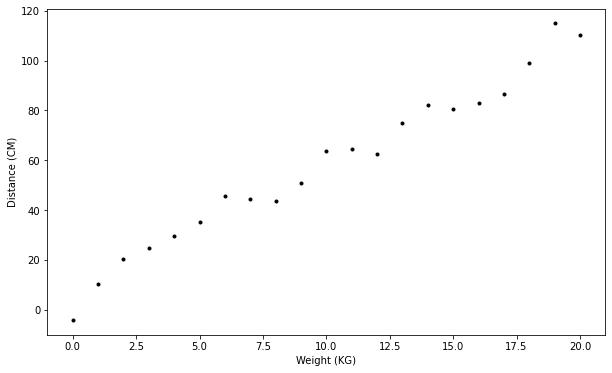

In [4]:
# Create the plot.
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, y, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

We can draw a conclusion from the above plot, that the generated data follows a linear line. Points don't strictly follow the straight line, but they are also not far from it.

#### BEST FIT LINE

Using the formula for the linear line, we can draw various straight lines that would fit the simulated data

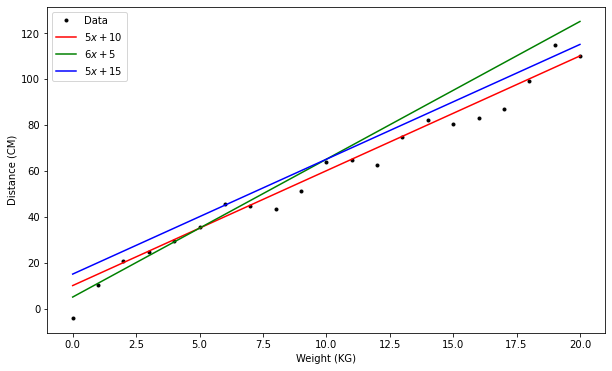

In [5]:
# Plot w versus d with black dots.
plt.plot(x, y, 'k.', label="Data")

# Overlay some lines on the plot.
a = np.arange(0.0, 21.0, 1.0)
plt.plot(a, 5.0 * a + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(a, 6.0 * a +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(a, 5.0 * a + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

It's visible from the above plot how each of the lines roughly fit the data, but the question is which one of those is the best one, and is there one that would with this data better. The usual approach is to use the *least-squares method*, which minimizes the squared difference between the actual data points and a straight line. The formula is:

###  $$ \sum_i (y_i - mx_i - c)^2 $$

| The corresponding value to $x_i$ in the dataset is $y_i$. The value $m x_i + c$ is what the model says $y_i$ should have been. The difference between  the value that was observed ($y_i$) and the value that the model gives ($m x_i + c$), is $y_i - mx_i - c$. |
| :-: |
|  |




##### TO DRAW
<center><img src="https://atmos.washington.edu/~robwood/teaching/451/labs/images/concepts12.jpg" width="300"/></center>

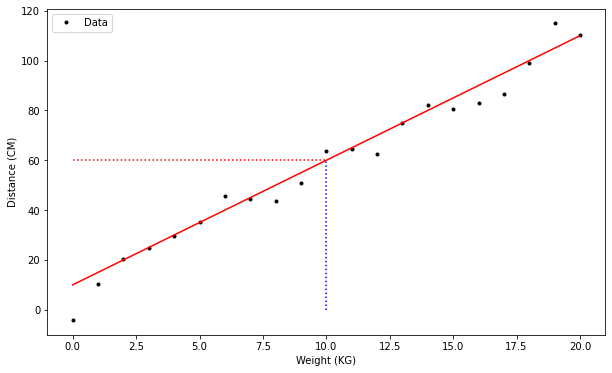

In [6]:
# Plot w versus d with black dots.
plt.plot(x, y, 'k.', label="Data")

# Overlay some lines on the plot.
a = np.arange(0.0, 21, 1.0)
plt.plot(a, 5.0 * a + 10.0, 'r-')

plt.plot([10, 10], [0, 60], 'b:')
plt.plot([0, 10], [60, 60], 'r:')


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

We can calculate the cost of the given lines using the formula above and determine which one is the best fitted.

In [7]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   624.06
Cost with m =  6.00 and c =  5.00:  2030.59
Cost with m =  5.00 and c = 15.00:  1517.69


We can see that the red line, representing values m = 5 and c = 10 has the minimum value of the three. This just confirms what we already knew, considering we have simulated data ourselves. This however doesn't necessarily means the best fitted line is the red one. We use the cost formula to calculate this.

#### MINIMISING THE COST

We first calculate the mean (average) values of our $x$ values and that of our $y$ values. Then we subtract the mean of $x$ from each of the $x$ values, and the mean of $y$ from each of the $y$ values. Then we take the *dot product* of the new $x$ values and the new $y$ values and divide it by the dot product of the new $x$ values with themselves. That gives us $m$, and we use $m$ to calculate $c$.

We calculate $m$ and $c$ below.

##### CALCULATE $m$ and $c$ BY HAND

In [8]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 5.166946 and c is 6.575137.


##### CALCULATE $m$ and $c$ USING PYTHON LIBRARY

Python *Numpy* library can be used to do the above calculation in one line of code. It can also be used to fit lines in many dimensions.

In [9]:
np.polyfit(x, y, 1)

array([5.16694627, 6.57513726])

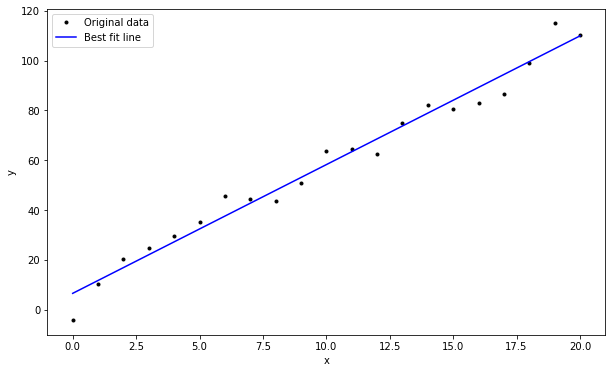

In [10]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot.
plt.show()

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 1</h4>

<h5 style="color: #001a79;">Use numpy and matplotlib to plot the absolute value function. Research and explain why the absolute value function is not typically used in fitting straight lines to data.</h5>
<hr style="border-top: 1px solid #001a79;" />

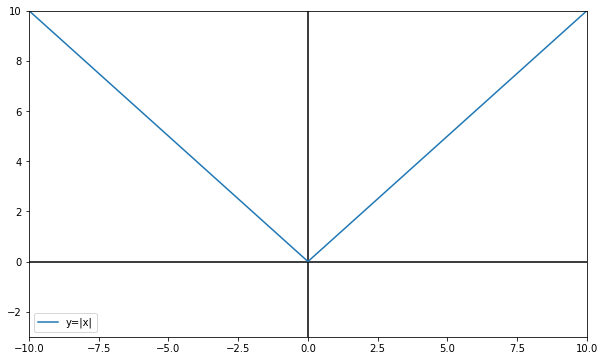

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
# Draw some axes.
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([0, 0], [-10, 10], 'k-')

x = np.arange(-10, 11, 1.0)
y = abs(x)
plt.plot(x, y, label="y=|x|")
plt.legend()
# Set some reasonable plot limits.
plt.xlim([-10, 10])
plt.ylim([-3, 10])



# Show the plot.
plt.show()

https://math.stackexchange.com/questions/3580109/why-does-regression-use-least-squares-instead-of-least-absolute-values

<hr style="border-top: 1px solid #001a79;" />

### OPTIMIZATION

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In this section we will use three different Python methods to minimize the cost function.

#### SCIPY.OPTIMIZE.MINIMIZE

#### METHOD 2

#### METHOD 3

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 2</h4>

<h5 style="color: #001a79;">Fit a straight line to the following data points, using all three methods used above. Do you think a straight line is a good model for these points?</h5>
<h5 style="color: #001a79;">x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]</h5>
<h5 style="color: #001a79;">y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]</h5>
<hr style="border-top: 1px solid #001a79;" />

<hr style="border-top: 1px solid #001a79;" />

### REFERENCES

1. https://www.igi-global.com/dictionary/mathematical-model/18021
2. https://www.mathscareers.org.uk/what-is-mathematical-modelling/
3. https://en.wikipedia.org/wiki/Mathematical_model
4. https://www.mathworks.com/discovery/linear-model.html
5. https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html
6. https://www.w3schools.com/python/python_ml_linear_regression.asp
7. https://thirdspacelearning.com/gcse-maths/algebra/y-mx-c/


https://scicomp.stackexchange.com/questions/21085/cost-function-why-use-power-of-two-absx-xhat-x-better

https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia#:~:text=Having%20a%20square%20as%20opposed,of%20estimation%20and%20regression%20analysis.

https://www.quora.com/Why-do-we-use-square-error-instead-of-absolute-value-when-we-calculate-R-2-in-regression-analysis

https://matheducators.stackexchange.com/questions/16948/why-is-absolute-value-difficult